# Geospatial Data Analysis I 

## Data visualisation - Solution

### Exercise 1

Plot the following two functions in the interval (i.e. on the x-axis range) $[0, 100]$ as line plots:

- $f(x) = \sqrt{x} - 4$
- $f(x) = log_e(x)$

Use the numpy functionality  `np.linspace (*start*, *stop*, *number of elements*)` to create a sequence (i.e. values) for 'x'. `np.linspace()` works similar to `np.arange()`, but instead of setting the step of the numerical sequence, the number of elements in the generated sequence has to be defined. The stop value is included in the sequence.

Then, calculate the corresponding 'y'-values using the equations above. Finally, use `matplotlib.pylot.plot()` to plot the lines in a 'x, y' diagram. 



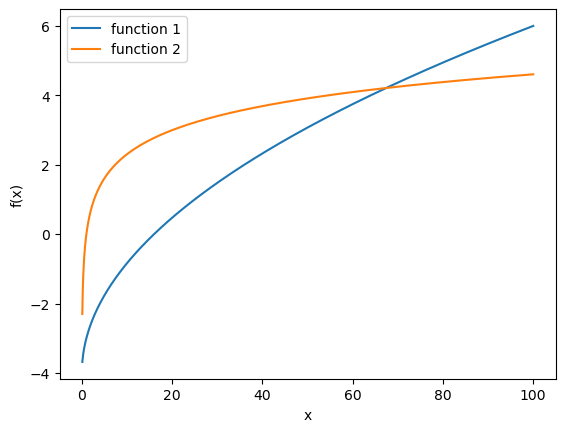

In [15]:
# [1]
import numpy as np
from matplotlib import pyplot as plt

# defining x values using np.linspace() 
x = np.linspace(0.1, 100, 1000)

# calculating y values for the first equation and plotting
y1 = np.sqrt(x) - 4
plt.plot(x, y1, label='function 1')

# calculating y values for the second equation and plotting
y2 = np.log(x)
plt.plot(x, y2, label='function 2')

# axis labels
plt.xlabel('x')
plt.ylabel('f(x)')

# legend 
plt.legend()
plt. show()

### Exercise 2

Create an array with 200 random numbers using `numpy.random.normal(mean, sigma, number)`, with 'mean' being the mean value (e.g. 0), 'sigma' being the standard deviation (e.g. 1) and 'n' being the number of values being created. 

Plot the created array in a figure with two subplots: a boxplot on the left side (`ax.boxplot(...)`), and a histogram (`ax.hist(...)`) on the right side. 

Finally, add axes labels and figure title to each subplot. You might also want to adapt the figure size, so that both graphs are properly shown beside each other. 

Tip: with two subplots your Axes-object will be an array with two entries. You can access the individual axis entries using the corresponding index `ax[0]` and `ax[1]`. 

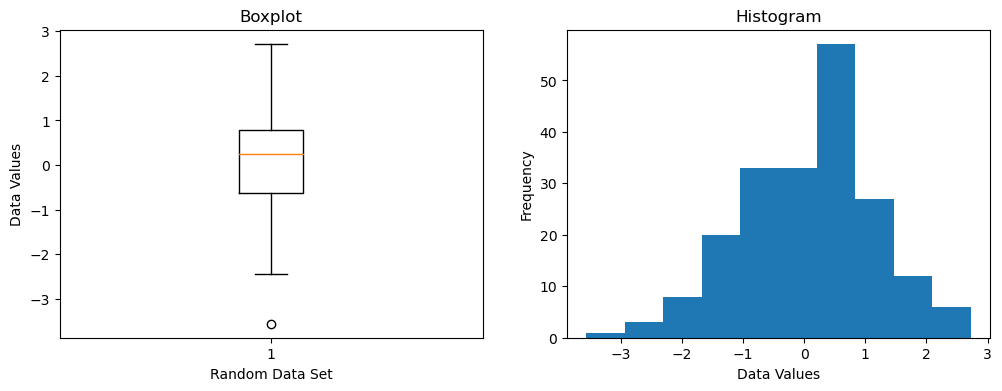

In [16]:
# [2]

# generate random numbers  
data = np.random.normal (0, 1, 200) # Standardnormalverteilung (0, 1)

# creating a Figure object and an Axes object with two subplots 
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Boxplot on the first Axis
axs[0].boxplot(data)
axs[0].set_xlabel('Random Data Set')
axs[0].set_ylabel('Data Values')
axs[0].set_title('Boxplot')

# Histogram on the second Axis
axs[1].hist(data)
axs[1].set_xlabel('Data Values')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Histogram')


plt.show()

### Exercise 3

The European Environmental Agency has put together a data set that highlights the relationship between energy use (kg oil / capita), economic power (as gross domestic product, GDP / capita) and population (see *EEA_dataset.csv*).  

1. Creat a scatter plot using `plt.scatter()`, showing GDP on the x-axis and energy use on the y-axis. Adapt the axes limits to the data.  

2. Calculate the global mean values for both axes using `np.mean()`, and mark them in the plot by adding a horizontal (`ax.axvline(x-value)`) and vertical (`ax.axhline(y-value)`) line at these locations. 

3. Highlight the marker for Germany in red. 

4. Visualise the population as color in the scatter plot, and add a corresponding colorbar as legend/axis for this dimension (`plt.colorbar(...)`).

Data source: [European Environment Agency](https://www.eea.europa.eu/data-and-maps/figures/correlation-of-per-capita-energy)

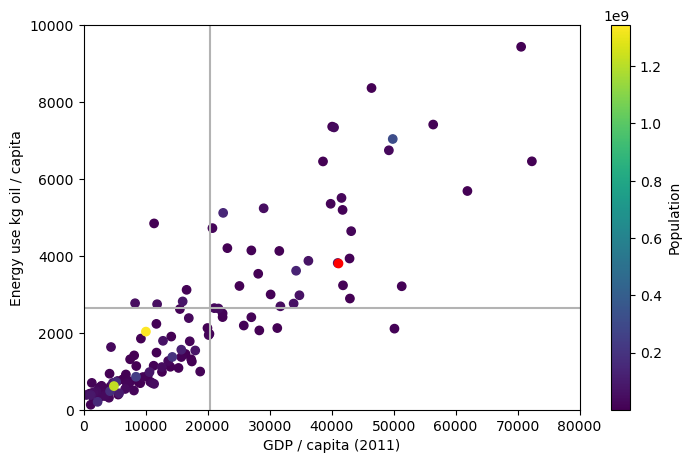

In [ ]:
# [3]
import pandas as pd

# reading the data  
#data = np.genfromtxt(open("EEA_dataset.csv", "rb"), delimiter=",", skip_header=1) # with numpy
data = pd.read_csv("EEA_dataset.csv", sep =',')


# creating Figure and Axes objects
fig, ax = plt.subplots(1, figsize=(8, 5))

color = data.iloc[:, 3]
cl = ax.scatter(data.iloc[:, 2], data.iloc[:, 1], c=color)

# calcualting average values 
x_avg = np.mean(data.iloc[:, 2].values)
y_avg = np.mean(data.iloc[:, 1].values)

# plotting average values as lines
ax.axvline(x_avg, c='0.7')
ax.axhline(y_avg, c='0.7')

# highlighting Germany 
id = data.loc[data.Country_Name =="Germany"].index[0]      # get the location of Germany in the DataFrame using a conditional argument 
ax.plot(data.iloc[id, 2], data.iloc[id, 1], 'ro') 

#de_idx = 116   # or simply check the csv file, Germany is in row 118 (-1 for the header, -1 for row 0)
#ax.plot(data.iloc[de_idx, 2], data.iloc[de_idx, 1], 'ro')

# add the colorbar for the population
cb = plt.colorbar(cl, label='Population')

# axes limits and labels 
ax.set_xlabel('GDP / capita (2011)')
ax.set_ylabel('Energy use kg oil / capita')

ax.set_xlim([0, 80000])
ax.set_ylim([0, 10000])

plt.show()

## END